<a href="https://colab.research.google.com/github/Vidhurathi045056/Report_FSM/blob/main/SIP_PAYSPRINT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import DBSCAN, KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv('/content/SIP TRANSACTION DATA.csv')

### Data Exploration and cleaning


In [ ]:
data.head()

,ID,USERNAME,TXNID,REFID,AMOUNT,CHARGES,GST,MERCHANT ID,MERCHANT VPA,ADDEDDDATE,BANK RRN,PAYER NAME,PAYER AMOUNT,PAYER VPA,TXN COMPLETION DATE,TXN INIT DATE,STATUS,API TYPE
0,24244918,PS00135,62679113.0,EZY2023042811370618680886,5000.0,0.4,0.07,6214460,spr31659643749577@icici,02-04-2024,3.180000e+11,GAUTAM ELECTRIC,5000.0,9572140705@ybl,2.020000e+13,2.020000e+13,Success,Static QR
1,24244917,PS0062,62679112.0,EZY2023012714031423144203,30000.0,0.0,0.00,5429960,relir001013432@icici,02-04-2024,3.180000e+11,JAVED IQBAL,30000.0,javediqbalcc@ybl,2.020000e+13,2.020000e+13,Success,Static QR
2,24244916,PS003923,62679131.0,EZY2023060717064435400402,2000.0,2.0,0.36,6277429,050636rr000016@icici,02-04-2024,3.180000e+11,SANJAY AGRAHARI,2000.0,sanjay.7454-21@waaxis,2.020000e+13,2.020000e+13,Success,Static QR
3,24244915,PS00135,62679113.0,EZY2023050212282930216382,1700.0,0.4,0.07,6218120,spr30399312370662@icici,02-04-2024,3.550000e+11,PRAMOD KUMAR PARIDA,1700.0,9853705366@paytm,2.020000e+13,2.020000e+13,Success,Static QR
4,24244914,PS00135,62679113.0,EZY2023042714130016437014,10000.0,0.4,0.07,6213251,spr19379899169931@icici,02-04-2024,3.180000e+11,ABIDDIN,10000.0,abidquresi.fusion-2@okhdfcbank,2.020000e+13,2.020000e+13,Success,Static QR


In [ ]:
data.describe()

,ID,TXNID,AMOUNT,CHARGES,GST,MERCHANT ID,BANK RRN,PAYER AMOUNT,TXN COMPLETION DATE,TXN INIT DATE
count,2.798400e+04,2.547300e+04,2.798400e+04,27866.000000,27866.000000,2.798400e+04,2.786500e+04,27865.000000,2.786500e+04,2.786500e+04
mean,2.426375e+07,6.288035e+07,9.998083e+03,0.244893,0.043207,5.757517e+06,3.232465e+11,6447.159396,2.020000e+13,2.020000e+13
std,4.127705e+04,3.786744e+05,5.978768e+05,0.387824,0.069465,5.452048e+05,1.257099e+10,12490.649676,0.000000e+00,0.000000e+00
min,2.422597e+07,6.256885e+07,0.000000e+00,0.000000,0.000000,2.729802e+06,3.180000e+11,1.000000,2.020000e+13,2.020000e+13
25%,2.423296e+07,6.256887e+07,2.977500e+02,0.000000,0.000000,5.390161e+06,3.180000e+11,300.000000,2.020000e+13,2.020000e+13
50%,2.423996e+07,6.267911e+07,1.300000e+03,0.000000,0.000000,5.995305e+06,3.180000e+11,1300.000000,2.020000e+13,2.020000e+13
75%,2.432066e+07,6.342366e+07,6.000000e+03,0.400000,0.070000,6.217282e+06,3.190000e+11,6000.000000,2.020000e+13,2.020000e+13
max,2.432766e+07,6.342368e+07,1.000000e+08,2.000000,0.360000,6.328260e+06,3.560000e+11,100000.000000,2.020000e+13,2.020000e+13


In [ ]:
data.isnull().sum()

ID                        0
USERNAME                  0
TXNID                  2511
REFID                     0
AMOUNT                    0
CHARGES                 118
GST                     118
MERCHANT ID               0
MERCHANT VPA              0
ADDEDDDATE                0
BANK RRN                119
PAYER NAME              120
PAYER AMOUNT            119
PAYER VPA               119
TXN COMPLETION DATE     119
TXN INIT DATE           119
STATUS                    1
API TYPE                  1
dtype: int64

In [ ]:
import pandas as pd

# Load the dataset (replace 'your_file.xlsx' and 'Sheet1' with your actual file and sheet name)
df = pd.read_csv('/content/SIP TRANSACTION DATA.csv')

# List of columns with their null values
columns_with_nulls = [
    'USERNAME', 'TXNID', 'REFID', 'AMOUNT', 'CHARGES', 'GST', 'MERCHANT ID',
    'MERCHANT VPA', 'ADDEDDDATE', 'BANK RRN', 'PAYER NAME', 'PAYER AMOUNT',
    'PAYER VPA', 'TXN COMPLETION DATE', 'TXN INIT DATE', 'STATUS', 'API TYPE'
]

# Drop rows with null values in the specified columns
df_cleaned = df.dropna(subset=columns_with_nulls)

# Save the cleaned data to a new CSV file
df_cleaned.to_csv('cleaned_data.csv', index=False)


In [ ]:
data = pd.read_csv('/content/cleaned_data.csv')

In [ ]:
data.isnull().sum()

ID                     0
USERNAME               0
TXNID                  0
REFID                  0
AMOUNT                 0
CHARGES                0
GST                    0
MERCHANT ID            0
MERCHANT VPA           0
ADDEDDDATE             0
BANK RRN               0
PAYER NAME             0
PAYER AMOUNT           0
PAYER VPA              0
TXN COMPLETION DATE    0
TXN INIT DATE          0
STATUS                 0
API TYPE               0
dtype: int64

## Data Visualization

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler
import time
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}
start_time = time.time()
end_time = time.time()
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv(r'/content/cleaned_data.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71595 entries, 0 to 71594
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   71595 non-null  int64  
 1   USERNAME             71595 non-null  object 
 2   TXNID                71595 non-null  float64
 3   REFID                71595 non-null  object 
 4   AMOUNT               71595 non-null  float64
 5   CHARGES              71595 non-null  float64
 6   GST                  71595 non-null  float64
 7   MERCHANT ID          71595 non-null  int64  
 8   MERCHANT VPA         71595 non-null  object 
 9   ADDEDDDATE           71595 non-null  object 
 10  BANK RRN             71595 non-null  float64
 11  PAYER NAME           71595 non-null  object 
 12  PAYER AMOUNT         71595 non-null  float64
 13  PAYER VPA            71595 non-null  object 
 14  TXN COMPLETION DATE  71595 non-null  float64
 15  TXN INIT DATE        71595 non-null 

In [ ]:
data.nunique()

ID                     30632
USERNAME                  32
TXNID                    115
REFID                   3721
AMOUNT                  2583
CHARGES                    4
GST                        4
MERCHANT ID             3122
MERCHANT VPA            3122
ADDEDDDATE                 4
BANK RRN                   4
PAYER NAME             21236
PAYER AMOUNT            2583
PAYER VPA              25720
TXN COMPLETION DATE        1
TXN INIT DATE              1
STATUS                     1
API TYPE                   2
dtype: int64

In [ ]:
data.index

RangeIndex(start=0, stop=71595, step=1)

## Graphs and Analysis of the data


Peak Transaction Periods:
ADDEDDDATE
2024-11-04    75476392.27
2024-12-04    73155974.08
2024-10-04    67305406.10
2024-01-04    56943728.58
2024-02-04    37111000.72
Name: AMOUNT, dtype: float64


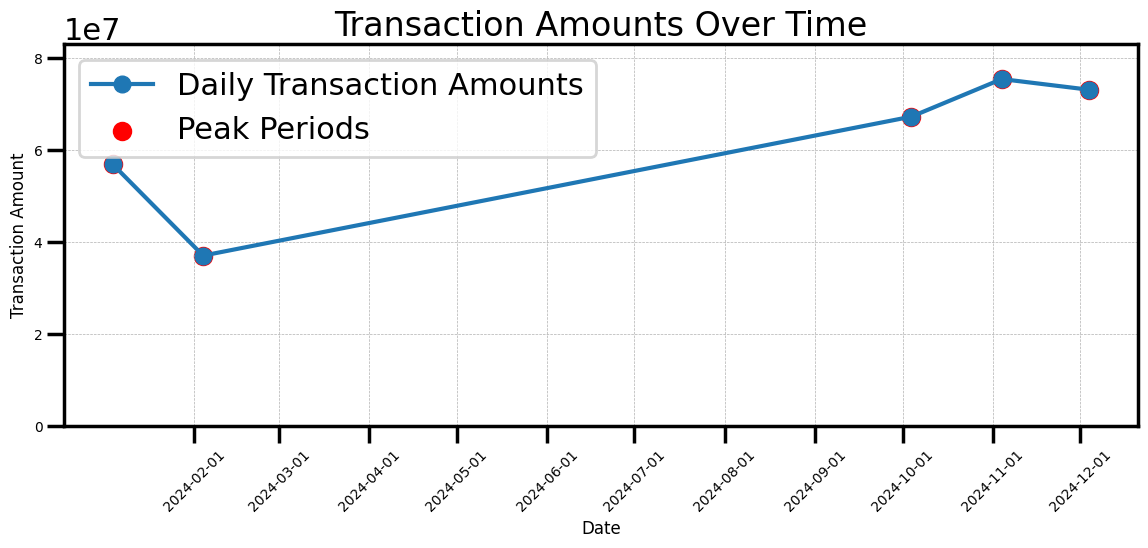

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r'/content/cleaned_data.csv')

# Convert date columns to datetime format
df['ADDEDDDATE'] = pd.to_datetime(df['ADDEDDDATE'], errors='coerce')

# Group by ADDEDDDATE and sum the transaction amounts per day
daily_amounts = df.groupby(df['ADDEDDDATE'].dt.date)['AMOUNT'].sum()

# Identify peak transaction periods
peak_transaction_periods = daily_amounts.nlargest(10)

# Print out the peak transaction periods
print("Peak Transaction Periods:")
print(peak_transaction_periods)

# Plot the transaction amounts over time highlighting peak periods
plt.figure(figsize=(12, 6))
plt.plot(daily_amounts.index, daily_amounts.values, marker='o', linestyle='-', label='Daily Transaction Amounts')
plt.scatter(peak_transaction_periods.index, peak_transaction_periods.values, color='red', label='Peak Periods')

# Improve x-axis labels
plt.xticks(pd.date_range(start=daily_amounts.index.min(), end=daily_amounts.index.max(), freq='MS'), rotation=45, fontsize=10)
plt.yticks(fontsize=10)

plt.title('Transaction Amounts Over Time')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Transaction Amount', fontsize=12)
plt.ylim([0, daily_amounts.max() + daily_amounts.max() * 0.1])  # Fix scaling
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(loc='best')
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()


Correlation Matrix:
                AMOUNT   CHARGES       GST  PAYER AMOUNT
AMOUNT        1.000000  0.256009  0.253233      1.000000
CHARGES       0.256009  1.000000  0.999902      0.256009
GST           0.253233  0.999902  1.000000      0.253233
PAYER AMOUNT  1.000000  0.256009  0.253233      1.000000


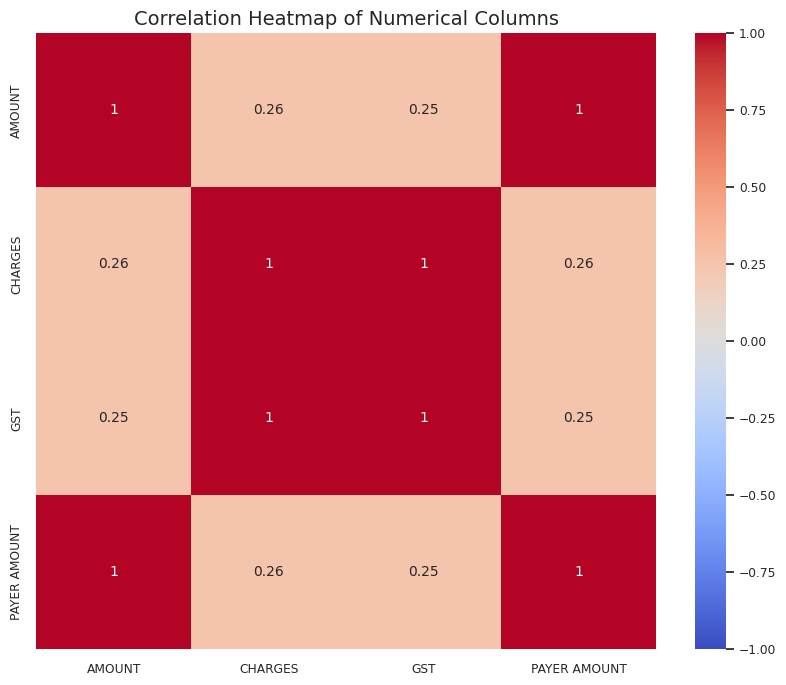

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r'/content/cleaned_data.csv')


# Select the relevant numerical columns
numerical_columns = ['AMOUNT', 'CHARGES', 'GST', 'PAYER AMOUNT']

# Drop rows with null values in the relevant numerical columns
df_cleaned = df.dropna(subset=numerical_columns)

# Compute the correlation matrix
correlation_matrix = df_cleaned[numerical_columns].corr()

# Print the correlation values
print("Correlation Matrix:")
print(correlation_matrix)

# Plot the correlation heatmap with adjusted font sizes
plt.figure(figsize=(10, 8))
sns.set(font_scale=0.8)  # Adjust font scale for all elements except the title
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, annot_kws={"size": 10})
plt.title('Correlation Heatmap of Numerical Columns', fontsize=14)
plt.show()


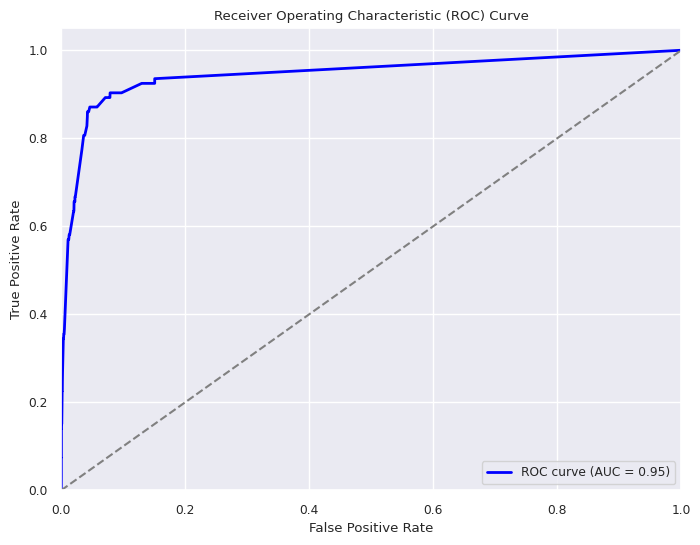

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, precision_recall_curve, auc

# Load the dataset
df = pd.read_csv(r'/content/cleaned_data.csv')

# Select relevant features and target variable
features = ['AMOUNT', 'CHARGES', 'GST', 'PAYER AMOUNT']
target = 'API TYPE'  # Use 'API TYPE' as the target variable

# Drop rows with null values in the selected columns
df_cleaned = df.dropna(subset=features + [target])

# Ensure 'API TYPE' is binary or can be converted to binary (if necessary)
# Example: Convert 'Static QR' to 0 and 'Dynamic QR' to 1
df_cleaned['API TYPE'] = df_cleaned['API TYPE'].apply(lambda x: 0 if x == 'Static QR' else 1)

# Split data into train and test sets
X = df_cleaned[features]
y = df_cleaned[target]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier (example model)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict probabilities for test set
y_pred_prob = clf.predict_proba(X_test)[:, 1]  # Use [:, 1] to get probabilities of positive class

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [ ]:
!pip install --upgrade scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 55.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


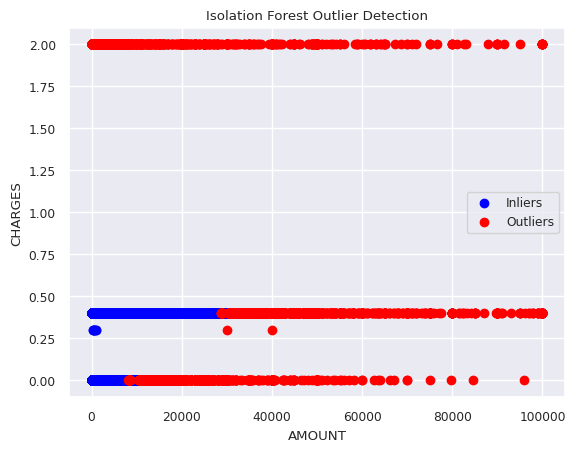

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Assuming df is your DataFrame containing the data
# df = pd.read_csv('your_data.csv')  # Load your data here

# Selecting the relevant columns for analysis (e.g., AMOUNT, CHARGES)
# Ensure these columns are numerical and suitable for outlier detection
X = df[['AMOUNT', 'CHARGES']].values

# Initialize IsolationForest
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X)

# Mask for inliers and outliers
mask = yhat != -1
X_outliers = X[~mask]
X_inliers = X[mask]

# Plotting the results
plt.scatter(X_inliers[:, 0], X_inliers[:, 1], c='blue', label='Inliers')
plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red', label='Outliers')
plt.xlabel('AMOUNT')
plt.ylabel('CHARGES')
plt.legend()
plt.title('Isolation Forest Outlier Detection')
plt.show()


In [ ]:
pip install pandas numpy matplotlib scikit-learn


For k=1:
Davies-Bouldin Score: Not applicable for k=1
Silhouette Score: Not applicable for k=1


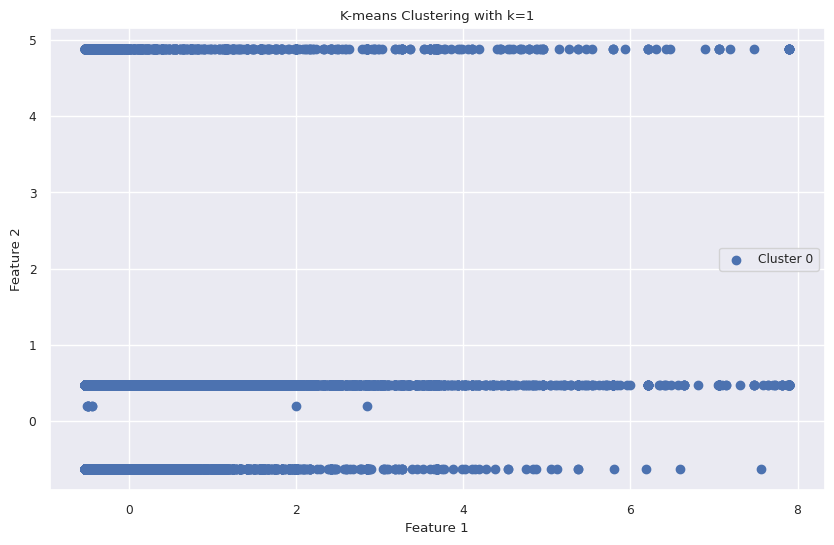

For k=2:
Davies-Bouldin Score: 0.9844055825460291
Silhouette Score: 0.6890030089079732
One-way ANOVA F-value: 52328.26975697823, p-value: 0.0


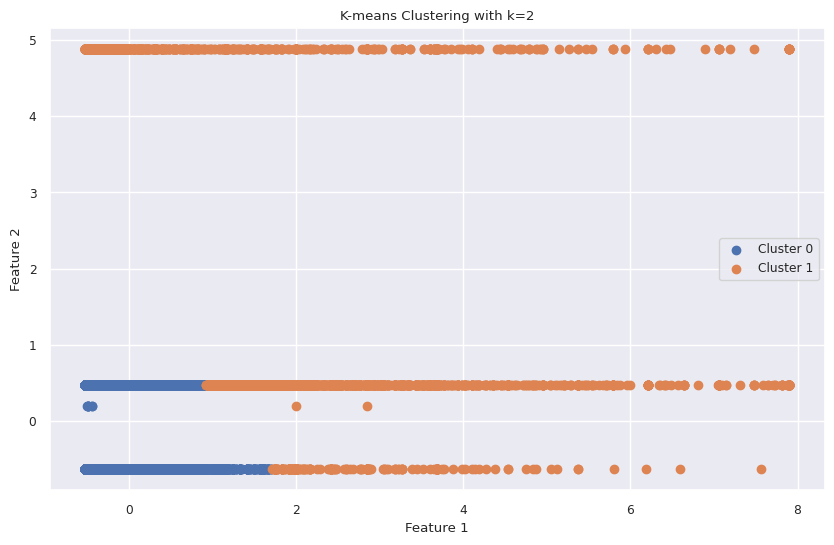

For k=3:
Davies-Bouldin Score: 0.5947580650785687
Silhouette Score: 0.6861138492745213
One-way ANOVA F-value: 36316.14330026124, p-value: 0.0


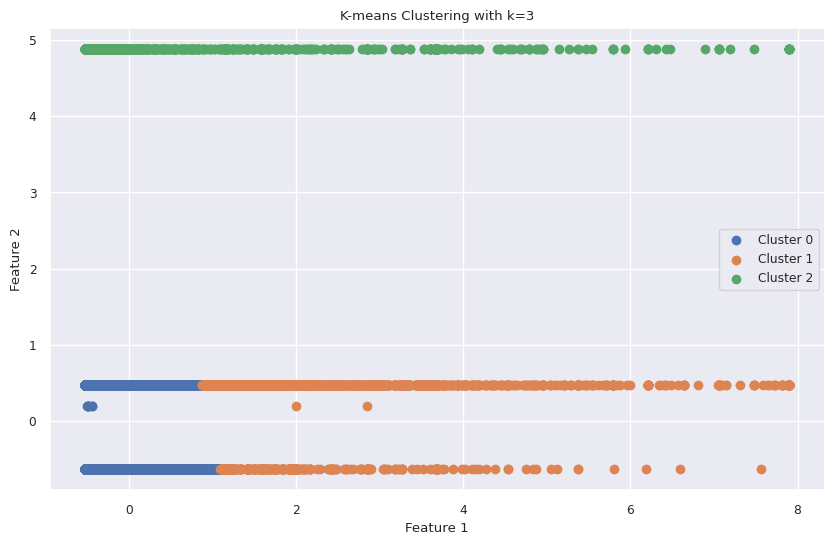

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score, silhouette_score
from scipy.stats import f_oneway

# Select relevant columns for clustering
relevant_columns = ['AMOUNT', 'CHARGES', 'GST', 'PAYER AMOUNT']
df = data[relevant_columns]

# Handle missing values
df = df.dropna()

# Normalize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Function to perform k-means clustering and evaluate
def evaluate_kmeans(df_scaled, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(df_scaled)

    cluster_data = pd.DataFrame(df_scaled, columns=relevant_columns)
    cluster_data['Cluster'] = clusters

    if k > 1:
        db_score = davies_bouldin_score(df_scaled, clusters)
        silhouette_avg = silhouette_score(df_scaled, clusters)
    else:
        db_score = None
        silhouette_avg = None

    return cluster_data, db_score, silhouette_avg

# Plot clusters
def plot_clusters(cluster_data, k):
    plt.figure(figsize=(10, 6))
    for i in range(k):
        cluster_points = cluster_data[cluster_data['Cluster'] == i]
        plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], label=f'Cluster {i}')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'K-means Clustering with k={k}')
    plt.legend()
    plt.show()

# Evaluate for k=1, k=2, k=3
for k in range(1, 4):
    cluster_data, db_score, silhouette_avg = evaluate_kmeans(df_scaled, k)
    print(f'For k={k}:')
    if db_score is not None and silhouette_avg is not None:
        print(f'Davies-Bouldin Score: {db_score}')
        print(f'Silhouette Score: {silhouette_avg}')

        if k > 1:
            f_value, p_value = f_oneway(*[cluster_data[cluster_data['Cluster'] == cluster][relevant_columns[0]] for cluster in range(k)])
            print(f'One-way ANOVA F-value: {f_value}, p-value: {p_value}')
    else:
        print('Davies-Bouldin Score: Not applicable for k=1')
        print('Silhouette Score: Not applicable for k=1')

    plot_clusters(cluster_data, k)


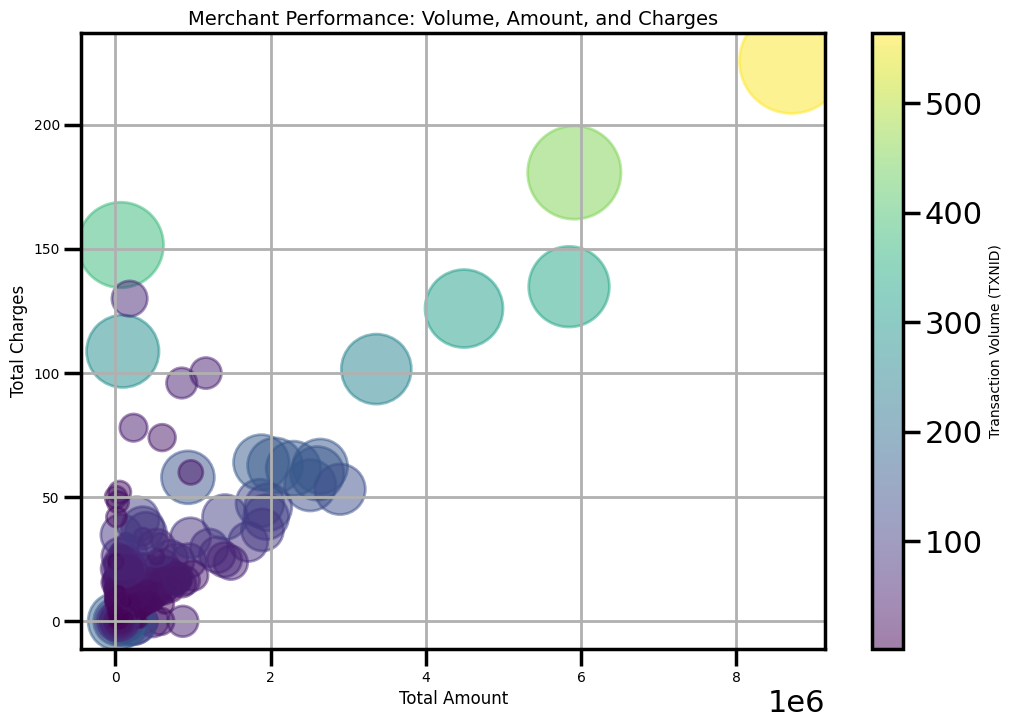

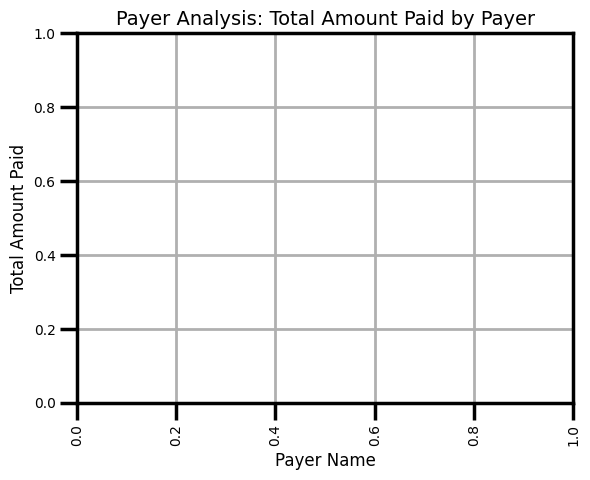

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r'/content/cleaned_data.csv')

# Handle missing values if necessary
data = data.dropna(subset=['MERCHANT ID', 'PAYER NAME', 'AMOUNT', 'CHARGES'])

# Bubble Chart: Merchant Performance
merchant_performance = data.groupby('MERCHANT ID').agg({
    'TXNID': 'count',         # Volume of transactions
    'AMOUNT': 'sum',          # Total amount collected
    'CHARGES': 'sum'          # Total charges applied
}).reset_index()

plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    merchant_performance['AMOUNT'],
    merchant_performance['CHARGES'],
    s=merchant_performance['TXNID']*10,
    c=merchant_performance['TXNID'],
    cmap='viridis',
    alpha=0.5
)
colorbar = plt.colorbar(scatter)
colorbar.set_label('Transaction Volume (TXNID)', fontsize=10)
plt.xlabel('Total Amount', fontsize=12)
plt.ylabel('Total Charges', fontsize=12)
plt.title('Merchant Performance: Volume, Amount, and Charges', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.show()


colorbar = plt.colorbar(scatter)
colorbar.set_label('Total Amount Paid', fontsize=10)
plt.xlabel('Payer Name', fontsize=12)
plt.ylabel('Total Amount Paid', fontsize=12)
plt.title('Payer Analysis: Total Amount Paid by Payer', fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.show()


Mean Squared Error: 4.4201926124428646e-23
R^2 Score: 1.0


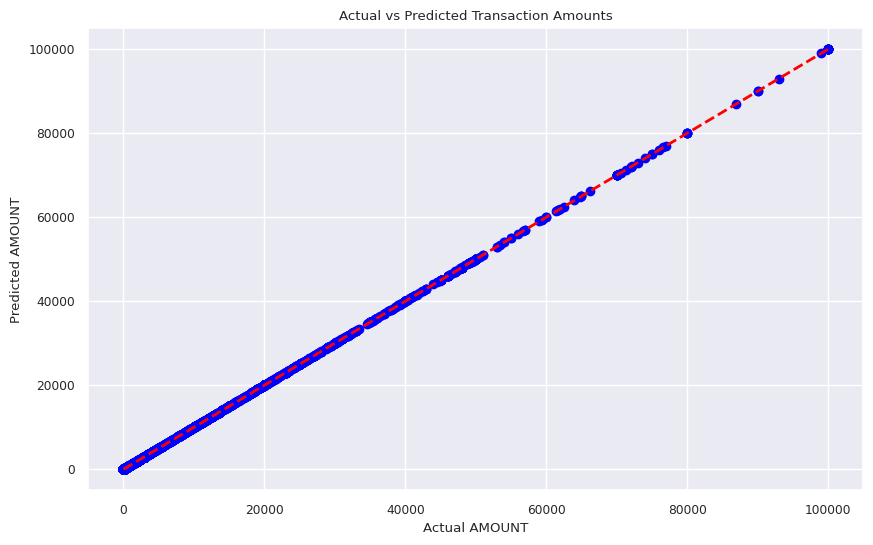

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select relevant columns
relevant_columns = ['AMOUNT', 'CHARGES', 'GST', 'PAYER AMOUNT']
data = data[relevant_columns]

# Handle missing values by dropping rows with any missing values
data = data.dropna()

# Define predictors (X) and target (y)
X = data[['CHARGES', 'GST', 'PAYER AMOUNT']]
y = data['AMOUNT']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual AMOUNT')
plt.ylabel('Predicted AMOUNT')
plt.title('Actual vs Predicted Transaction Amounts')
plt.grid(True)
plt.show()


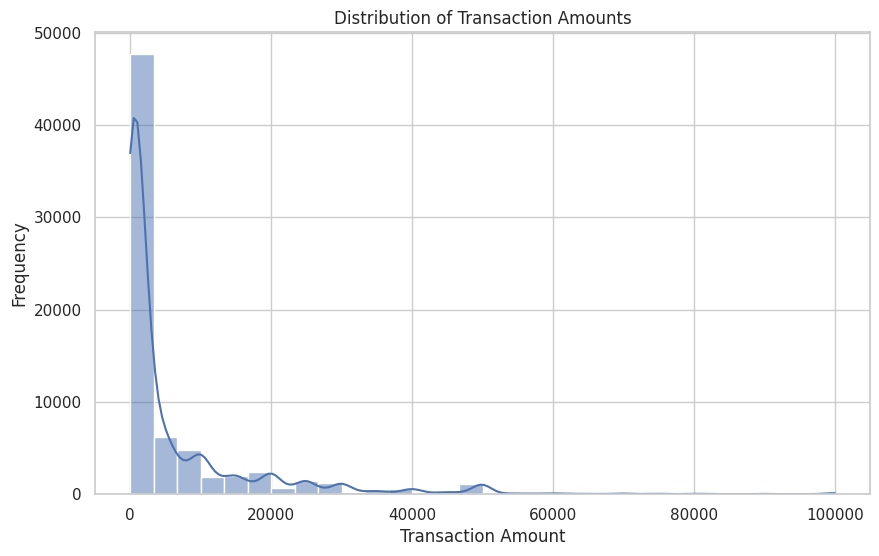

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# Distribution of Transaction Amounts
plt.figure(figsize=(10, 6))
sns.histplot(data['AMOUNT'], bins=30, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()





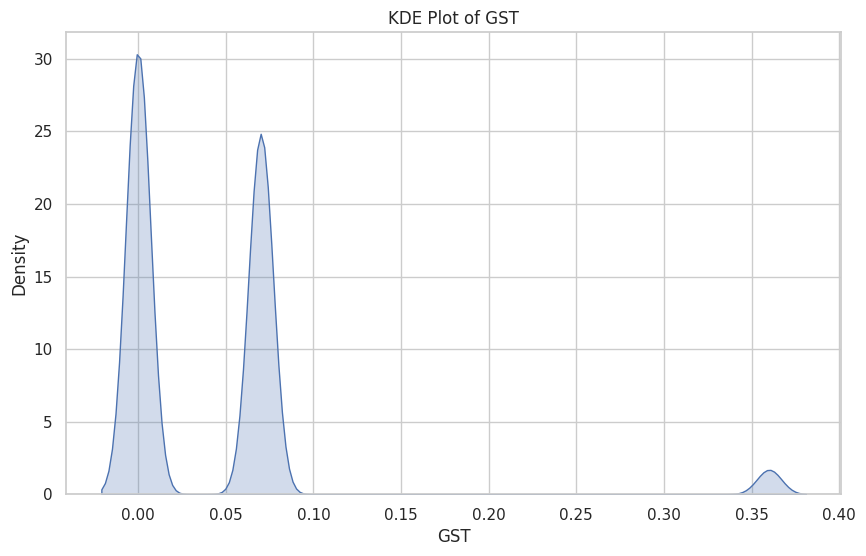

In [ ]:
import seaborn as sns

# Convert columns to numeric
data['GST'] = pd.to_numeric(data['GST'], errors='coerce')
data = data.dropna(subset=['GST'])

# Create a KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data['GST'], fill=True)
plt.title('KDE Plot of GST')
plt.xlabel('GST')
plt.ylabel('Density')
plt.show()


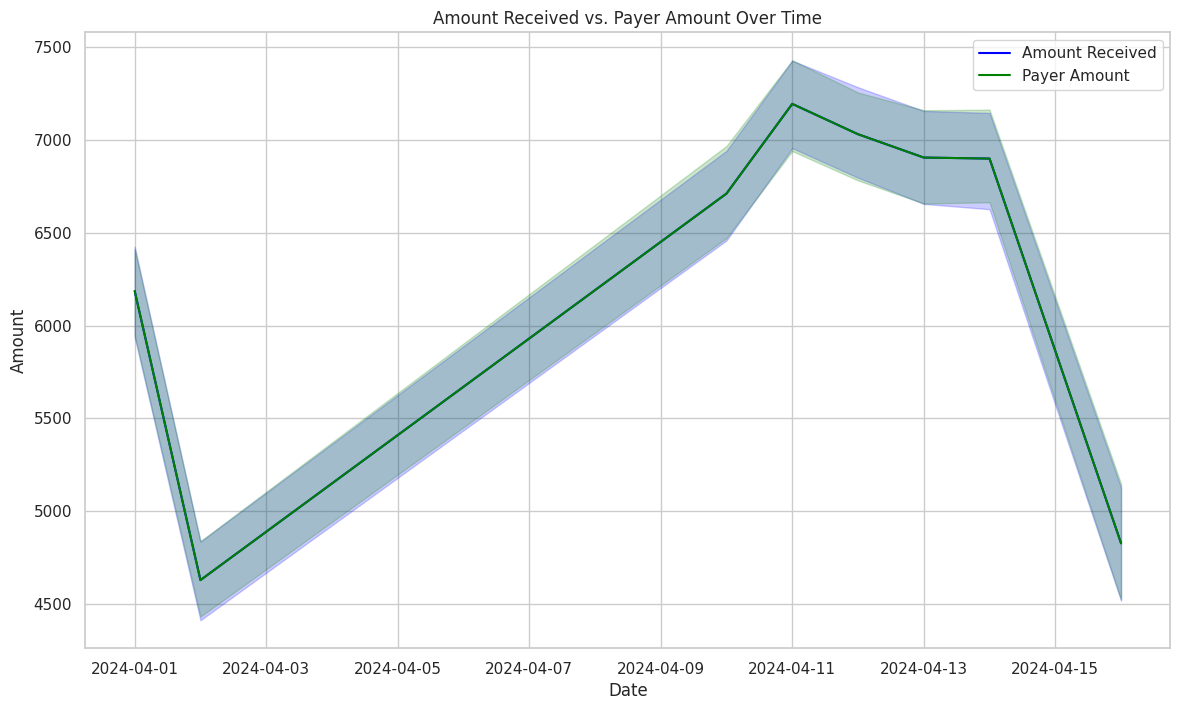

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert date columns to datetime format if not already done
data['ADDEDDDATE'] = pd.to_datetime(data['ADDEDDDATE'], format='%d-%m-%Y')

# Convert columns to numeric
data['AMOUNT'] = pd.to_numeric(data['AMOUNT'], errors='coerce')
data['PAYER AMOUNT'] = pd.to_numeric(data['PAYER AMOUNT'], errors='coerce')

# Drop rows with missing values in 'AMOUNT' or 'PAYER AMOUNT'
data = data.dropna(subset=['AMOUNT', 'PAYER AMOUNT'])

# Set the date as the index
data.set_index('ADDEDDDATE', inplace=True)

# Create the plot
plt.figure(figsize=(14, 8))
sns.lineplot(data=data, x=data.index, y='AMOUNT', label='Amount Received', color='blue')
sns.lineplot(data=data, x=data.index, y='PAYER AMOUNT', label='Payer Amount', color='green')
plt.title('Amount Received vs. Payer Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.grid(True)
plt.show()
